In [86]:
%reset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Opdracht 1: Exploratieve Data Analyse:
Gemaakt door de Majestueuze data-jokers:

&nbsp;&nbsp;&nbsp;&nbsp;Mark "Markolie20" Olieman <br>
&nbsp;&nbsp;&nbsp;&nbsp;Daan "Daan Eising" Eising <br>
&nbsp;&nbsp;&nbsp;&nbsp;Jesse "zdfgdfsg" van der Westen <br>

In [99]:
class EDA:
    def __init__(self, df):
        self.df = df
        self.df_copy = df
        self.feature_columns = self.df.columns.difference(["p_id", "Outcome"])
        self.corr = pd.DataFrame()
        
    def reset_df(self):
        self.df = self.df_copy
    
    def display_stats(self):
        stats = self.df[self.feature_columns].describe().T
        stats['dtype'] = [self.df[col].dtype for col in self.feature_columns]
        display(stats)

    def boxplots(self):
        fig, axes = plt.subplots(len(self.feature_columns), 1, figsize=(10, 20))
        fig.tight_layout()    
        for index, col in enumerate(self.feature_columns):
            sns.boxplot(x=self.df[col], ax=axes[index])
            
    def clean_zero_values(self, columns):
        for col in columns:
#             print(col, self.df.loc[self.df[col] == 0]["Outcome"].value_counts())
#             print(self.df["Outcome"].value_counts())
            self.df = self.df.drop(self.df.loc[(df[col] == 0)].index)
            
    def get_corr(self):
        target_col = "Outcome"
        self.corr = pd.DataFrame(self.df[self.feature_columns].corrwith(self.df[target_col]))
        self.corr = self.corr.sort_values(0, ascending=False)
        return self.corr
                    
    def corr_heatmap(self):
        fig = plt.figure()
        sns.heatmap(self.get_corr(), annot=True)
            
    

In [100]:
df = pd.read_csv("train_c.csv")
eda = EDA(df)

,count,mean,std,min,25%,50%,75%,max,dtype
Age,614.0,33.265472,11.851427,21.000,24.000,29.0000,41.0000,72.00,int64
BMI,614.0,31.929642,8.136791,0.000,27.400,32.1500,36.5000,67.10,float64
BloodPressure,614.0,68.903909,19.933385,0.000,62.000,72.0000,80.0000,114.00,int64
DiabetesPedigreeFunction,614.0,0.468096,0.329203,0.078,0.238,0.3655,0.6285,2.42,float64
Glucose,614.0,120.465798,31.959619,0.000,99.000,115.0000,140.0000,197.00,int64
Insulin,614.0,81.250814,116.947384,0.000,0.000,27.0000,130.0000,744.00,int64
Pregnancies,614.0,3.809446,3.375544,0.000,1.000,3.0000,6.0000,15.00,int64
SkinThickness,614.0,20.456026,16.063105,0.000,0.000,23.0000,32.0000,99.00,int64


Glucose 0    3
1    1
Name: Outcome, dtype: int64
0    404
1    210
Name: Outcome, dtype: int64
BMI 0    9
1    2
Name: Outcome, dtype: int64
0    401
1    209
Name: Outcome, dtype: int64
BloodPressure 0    12
1    12
Name: Outcome, dtype: int64
0    392
1    207
Name: Outcome, dtype: int64
SkinThickness 0    98
1    55
Name: Outcome, dtype: int64
0    380
1    195
Name: Outcome, dtype: int64
Insulin 0    72
1    38
Name: Outcome, dtype: int64
0    282
1    140
Name: Outcome, dtype: int64


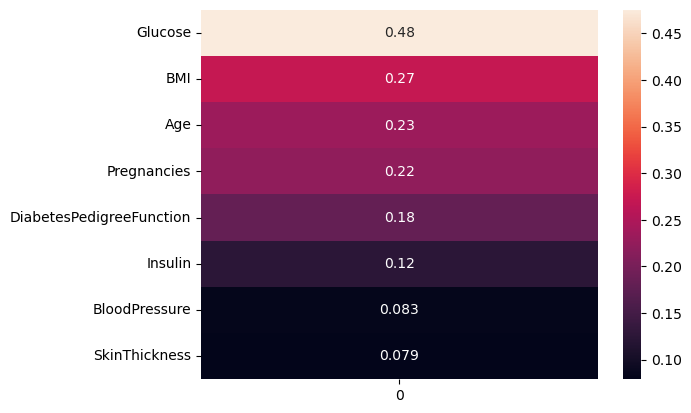

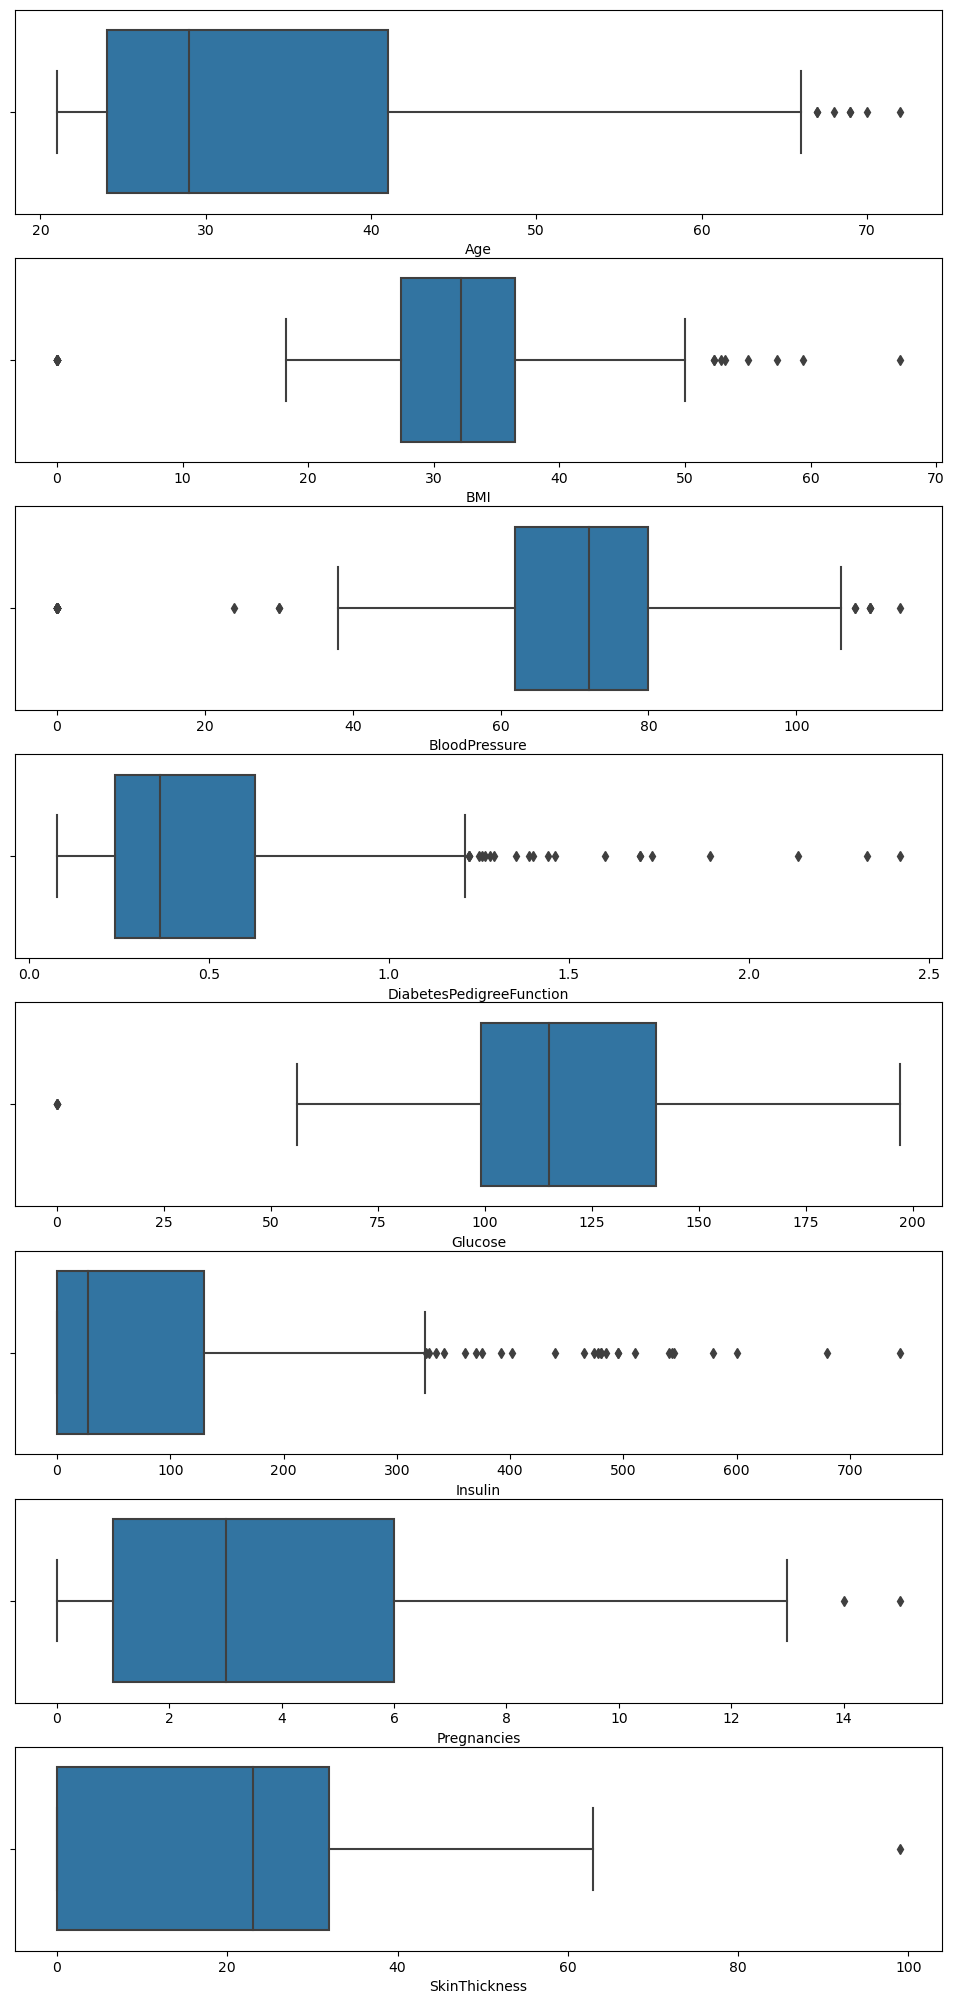

In [101]:
eda.reset_df()
eda.corr_heatmap()
eda.display_stats()
eda.boxplots()
eda.clean_zero_values(['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin'])

## Voldoet de data aan de voorwaarden voor machine learning?
De data voldoet aan de voorwaarden aangezien de data:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In een dataframe staat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Geen lege waardes bevat<br>
&nbsp;&nbsp;&nbsp;&nbsp;- In numerieke waardes is beschreven<br>

Echter vinden wij dat de data nog schoongemaakt kan worden, dit vinden wij omdat in de boxplots te zien valt dat 'Glucose', 'BMI', 'BloodPressure', en 'SkinThickness' waardes van 0 bevatten, dit is niet mogelijk in levende mensen en dus is het geen bruikbare data. Wij verwijderen de rijen met deze nulwaardes om zo de data op te schonen.

Ook zien we dat "Insulin" en "DiabetesPedigreeFunction" veel uitschieters bevat, wij vinden het belangrijk om deze data alsnog mee te nemen aangezien wij denken dat dit wellicht komt door omstandigheden die ook kunnen bijdragen aan diabetes.

,count,mean,std,min,25%,50%,75%,max,dtype
Age,312.0,30.512821,9.845747,21.000,23.000,27.000,35.25000,63.00,int64
BMI,312.0,33.320833,7.187935,18.200,28.475,33.300,37.02500,67.10,float64
BloodPressure,312.0,71.083333,12.705144,24.000,62.000,72.000,80.00000,110.00,int64
DiabetesPedigreeFunction,312.0,0.515574,0.346315,0.085,0.261,0.448,0.68325,2.42,float64
Glucose,312.0,122.326923,30.566919,56.000,99.000,119.000,143.25000,197.00,int64
Insulin,312.0,159.538462,120.123403,14.000,79.000,127.000,193.25000,744.00,int64
Pregnancies,312.0,3.182692,3.192932,0.000,1.000,2.000,4.00000,15.00,int64
SkinThickness,312.0,29.358974,10.522644,7.000,21.000,29.000,37.00000,63.00,int64


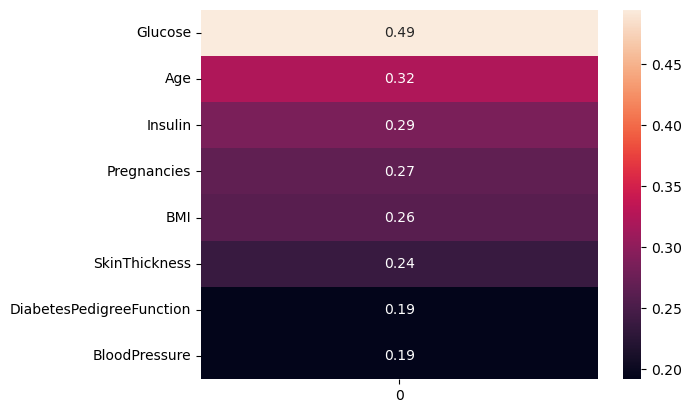

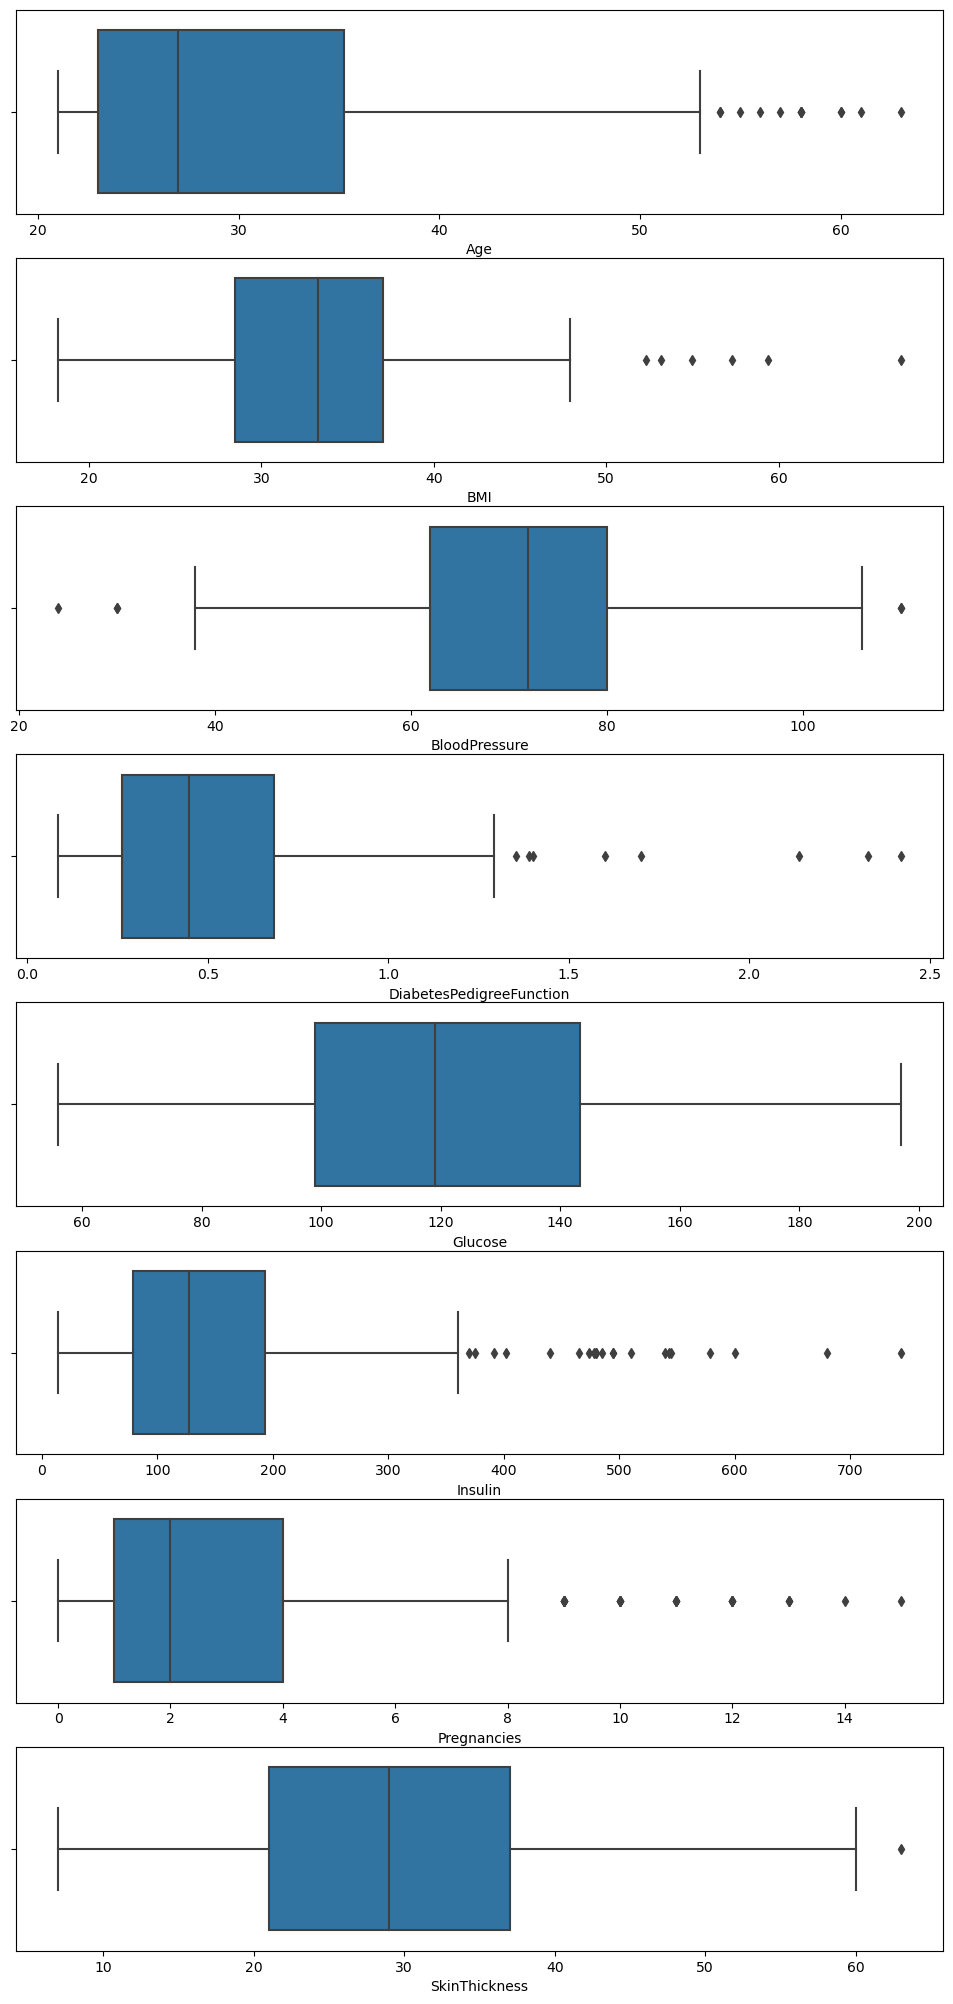

In [98]:
eda.display_stats()
eda.corr_heatmap()
eda.boxplots()